# Project II Pipelines

In [1]:
## Libraries import section
import pandas as pd
import geopandas as gpd
import src.downloading_cleaning as cl
import src.scrapping as sc
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
## re-load py files
import importlib
import src.scrapping as sc
importlib.reload(sc)

<module 'src.scrapping' from 'C:\\Users\\Sbort\\ironhack\\project-II-pipelines\\src\\scrapping.py'>

## Import database and initial cleaning
- Import Agoda.com hotel list
- Remove blank rows (if any)
- Remove duplicates (if any)
- Remove uncessary columns for this study

In [ ]:
agoda = cl.import_clean('./data/agoda.csv')

In [3]:
## Generating a subset of the columns that are going to be used after
agoda2 = agoda[["hotel_id", "hotel_name", "city", "country", "countryisocode", "longitude", "latitude", "continent_name"]]

In [4]:
agoda2 

,hotel_id,hotel_name,city,country,countryisocode,longitude,latitude,continent_name
0,1,Sai Kaew Beach Resort (SHA Plus+),Ko Samet,Thailand,TH,101.467007,12.568045,Asia
1,6,Marine Hotel,Dublin,Ireland,IE,-6.110340,53.388840,Europe
2,7,Pousada Vila do Mar,Buzios,Brazil,BR,-41.885799,-22.754910,South America
3,10,Malaga Alameda Centro Affiliated by Meliá,Málaga,Spain,ES,-4.432833,36.716057,Europe
4,13,NH Iquique Hotel (SHA Extra Plus),Iquique,Chile,CL,-70.129991,-20.269986,South America
...,...,...,...,...,...,...,...,...
642266,35575173,Pearl International,Kolkata,India,IN,88.362700,22.546343,Asia
642267,35582879,NOVA HOTEL OTOGAR,İstanbul,Turkey,TR,28.896189,41.037090,Europe
642268,35588130,Family Friendly 3 bedroom Suite @ Arte Plus Am...,Kuala Lumpur,Malaysia,MY,101.747529,3.161460,Asia
642269,35593358,Stelle Holiday Homes - Krish Villa,Lonavala,India,IN,73.399873,18.768859,Asia


# Comparing the Number of Hotels in Agoda and Booking
<ol>
    <li>Group Agoda hotel list by country</li>
    <li>Scrape Booking website to find the number of hotels in each country</li>
    <li>Check for errors in scrapping process</li>
    <li>Compare the two platforms</li>
</ol>

In [5]:
hotel_country = agoda2.groupby(['countryisocode'], as_index=False).agg(
    {"country": 'first', 'continent_name': 'first', 'hotel_id': 'count'}
)

In [6]:
hotel_country.rename(columns={'hotel_id': 'agoda_num'}, inplace=True, errors='raise')

In [7]:
hotel_country['booking_num'] = hotel_country.countryisocode.apply(sc.booking_country)

No hotels found in American Samoa
No hotels found in Isle of Man


### Total Number of Hotels by Platform

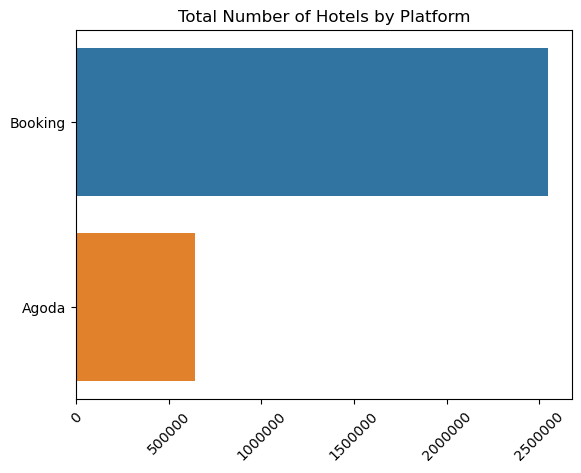

In [326]:
# Summing number of hotels by platform
total = hotel_country[['agoda_num','booking_num']].sum()
total= total.sort_values(ascending=False)
# Plotting
labels = ['Booking', 'Agoda']
total_graph = sns.barplot(data=total, x=total, y=labels)
total_graph.set(title = 'Total Number of Hotels by Platform')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='x')

### Number of Hotels by Region in The World

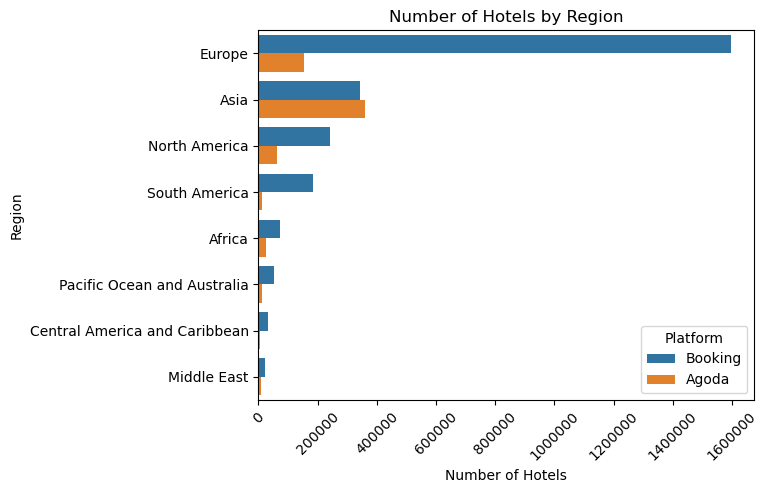

In [329]:
# Groupping data by region
regions = hotel_country.groupby("continent_name")[['agoda_num','booking_num']].sum()
#Creating a new column region
regions["Region"] = list(regions.index)
#Renaming columns
regions = regions.rename(columns={"agoda_num": "Agoda", "booking_num": "Booking"})
regions = regions.sort_values(by='Booking', ascending=False)
#Flattering table for plotting "each platform will generate a new row"
regions2 = pd.melt(regions, id_vars=["Region"], value_name="Number of Hotels")
# Plotting data
regions2 = regions2.rename(columns={"variable":"Platform"})
regions_graph=sns.barplot(data=regions2, x="Number of Hotels", y="Region", hue="Platform", hue_order= ["Booking", "Agoda"]) 
plt.xticks(rotation=45)
regions_graph.set(title = 'Number of Hotels by Region')
plt.ticklabel_format(style='plain', axis='x')


### Number of Hotels by Country
- Select the ten countries with more hotels in each platform
- Compare the two platform in these top countries

[Text(0.5, 1.0, 'Booking Top 10 Countries')]

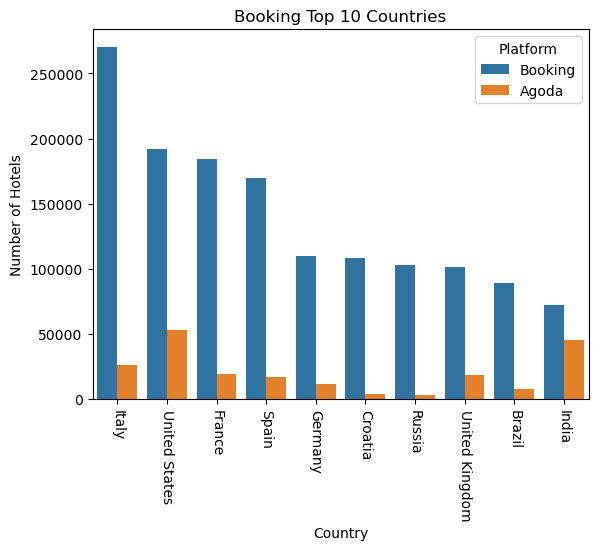

In [322]:
#generating subset of data and renaming
countries = hotel_country[["country", "agoda_num", "booking_num"]]
countries = countries.rename(columns={"agoda_num": "Agoda", "booking_num": "Booking"})
# flattern table to plot ("each platform will generate a row")
countries2 = pd.melt(countries, id_vars=["country"], value_name="Number of Hotels")
countries2 = countries2.rename(columns={"variable":"Platform", "country":"Country"})
#Generating a top 10 list of country for each platform 
top_booking = list(countries2.sort_values(by=['Platform','Number of Hotels'], ascending=False)[:10].Country)
top_agoda = list(countries2.sort_values(by=['Platform','Number of Hotels'], ascending=[True, False])[:10].Country)
#generating a subset only for the top 10 countries in each platform
countries_booking = countries2[countries2.Country.isin(top_booking)].sort_values(by='Number of Hotels', ascending=False)
countries_agoda = countries2[countries2.Country.isin(top_agoda)].sort_values(['Platform','Number of Hotels'], ascending=[True, False])
#ploting
cbooking_graph=sns.barplot(data=countries_booking, y="Number of Hotels", x="Country", hue="Platform", hue_order= ["Booking", "Agoda"])
plt.xticks(rotation=270)
cbooking_graph.set(title = 'Booking Top 10 Countries')

[Text(0.5, 1.0, 'Agoda Top 10 Countries')]

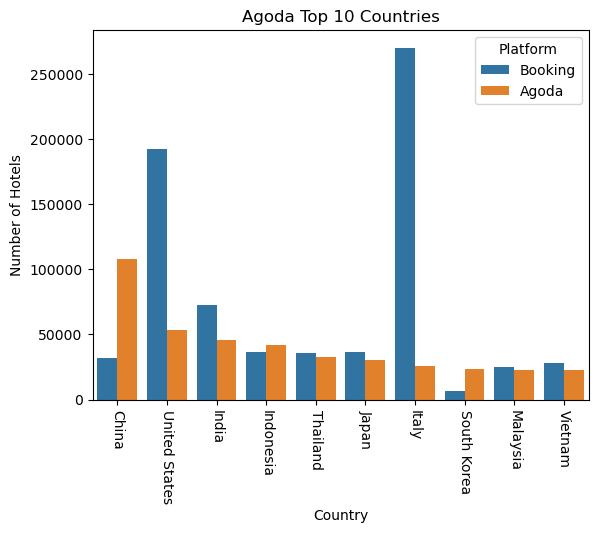

In [325]:
cagoda_graph=sns.barplot(data=countries_agoda, y="Number of Hotels", x="Country", hue="Platform", hue_order= ["Booking", "Agoda"])
plt.xticks(rotation=270)
cagoda_graph.set(title = 'Agoda Top 10 Countries')

## Comparing the Number and Distribution of Hotels in Agoda and Booking by Selected countries
- For each selected country:
    - Group the agoda hotel list by city and count it
    - Scrappe booking website for each city and add the number of hotels
    - Print cities where scrapping failed to find the hotels in a given city

### Taiwan

In [62]:
taiwan = sc.cities_country(agoda2, "Taiwan")

No hotels found in Kinmen Islands
No hotels found in Liuqiu
No hotels found in Matsu Island
No hotels found in Penghu


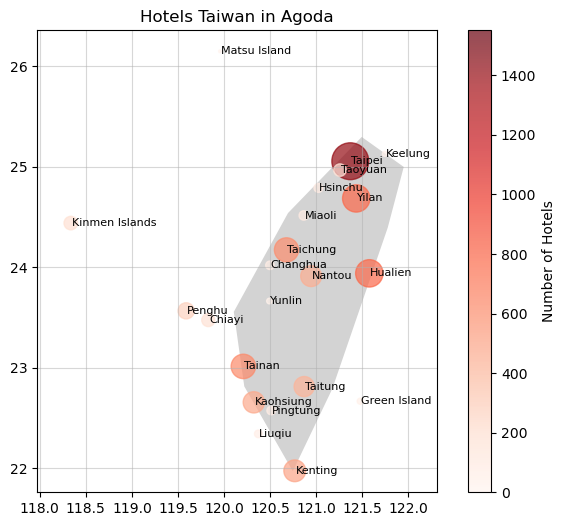

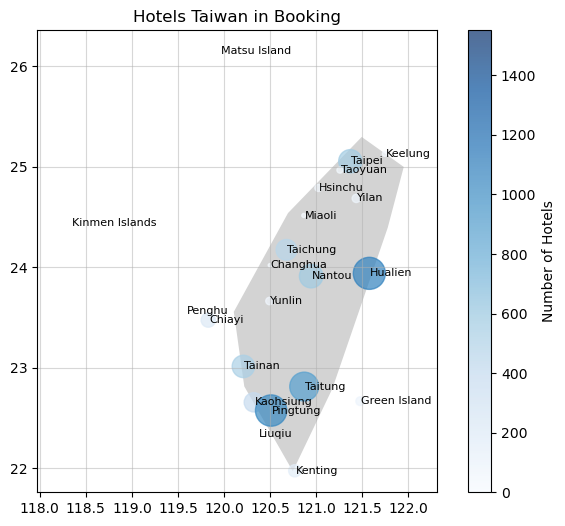

In [63]:
taiwan_agoda = sc.country_plot(taiwan, "Taiwan", "agoda")
taiwan_agoda = sc.country_plot(taiwan, "Taiwan", "booking")

### Thailand

In [64]:
thailand = sc.cities_country(agoda2, "Thailand")

No hotels found in Chai Prakan
No hotels found in Kanthararom
No hotels found in Kaset Sombun
No hotels found in Kaset Wisai
No hotels found in Khao Chamao
No hotels found in Koh Kood
No hotels found in Koh Sriboya
No hotels found in Lahan Sai
No hotels found in Na Muen
No hotels found in Nong Hong
No hotels found in Pakham
No hotels found in Phan
No hotels found in Phanna Nikhom
No hotels found in Phop Phra
No hotels found in Prathai
No hotels found in Si Thep
No hotels found in Song Hong
No hotels found in Takhli
No hotels found in Wiang Kaen


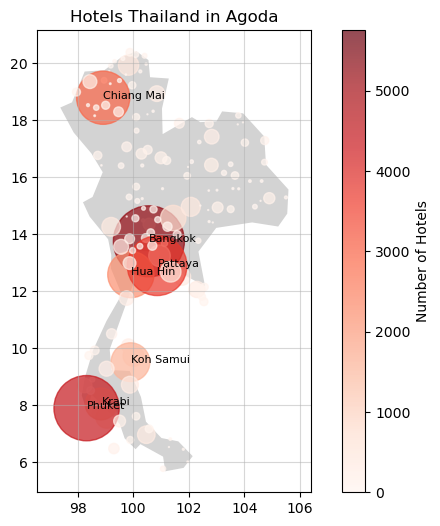

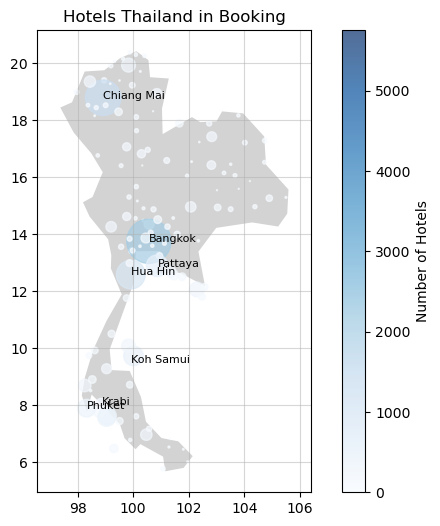

In [65]:
thailand_agoda = sc.country_plot(thailand, "Thailand", "agoda", names="top")
thailand_booking = sc.country_plot(thailand, "Thailand", "booking", names="top")

In [66]:
china = sc.cities_country(agoda2, "China")

No hotels found in Bayan Nur
No hotels found in Bayingol
No hotels found in Bortala
No hotels found in Chongzuo
No hotels found in Cushahuan
No hotels found in Da Hinggan Ling
No hotels found in Dehong
No hotels found in Gannan
No hotels found in Ganzi
No hotels found in Haibei
No hotels found in Haidong
No hotels found in Hainan
No hotels found in Haixi
No hotels found in Hinggan
No hotels found in Hotan
No hotels found in Ili
No hotels found in Kizilsu
No hotels found in Liangshan Yi
No hotels found in Liupanshui
No hotels found in Mount Emei
No hotels found in Ngari Diqu
No hotels found in Nujiang
No hotels found in Nyingchi
No hotels found in Qiandao Lake
No hotels found in Qiandongnan
No hotels found in Qiannan
No hotels found in Qianxinan
No hotels found in Qiongzhong Li and Miao
No hotels found in Shangrao Xian
No hotels found in Shannan
No hotels found in Shennongjia Linqu
No hotels found in Xilin Gol
No hotels found in Ziyang


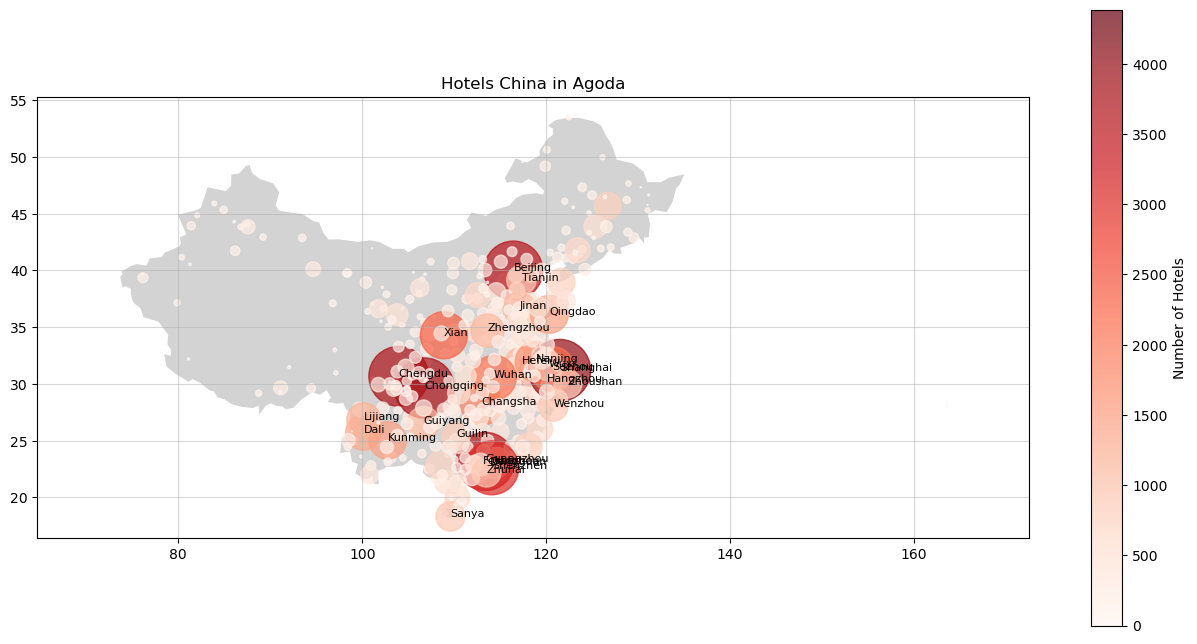

In [336]:
china_agoda = sc.country_plot(china, "China", "agoda", names="top", fh=8, fl=16)


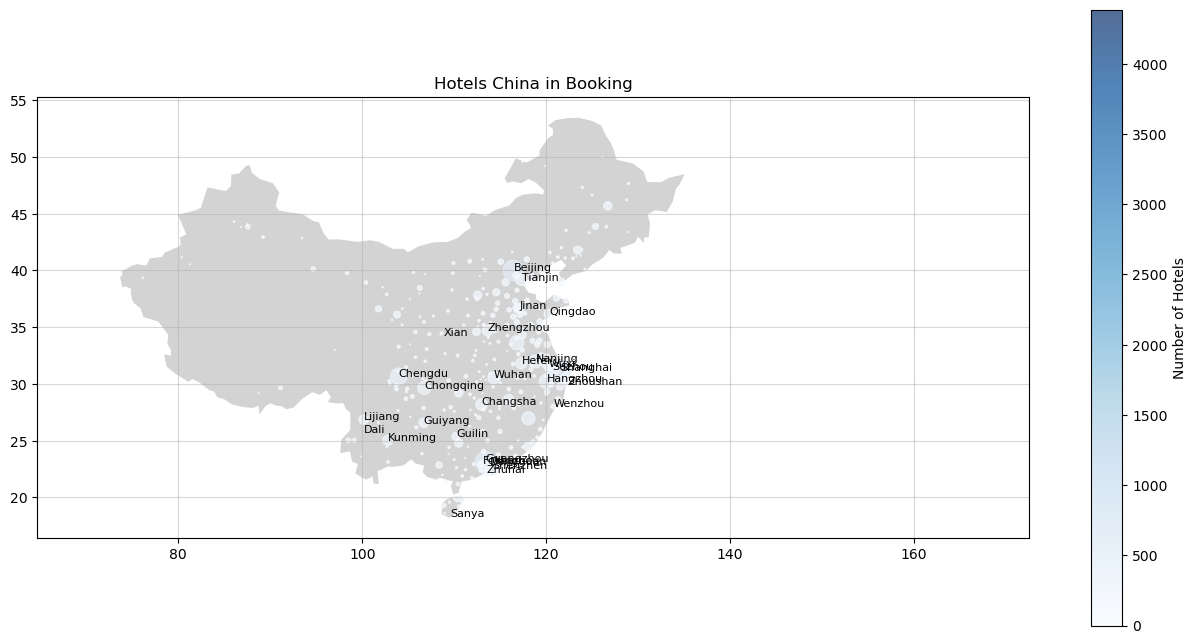

In [74]:
china_booking = sc.country_plot(china, "China", "booking", names="top", fh=8, fl=16)

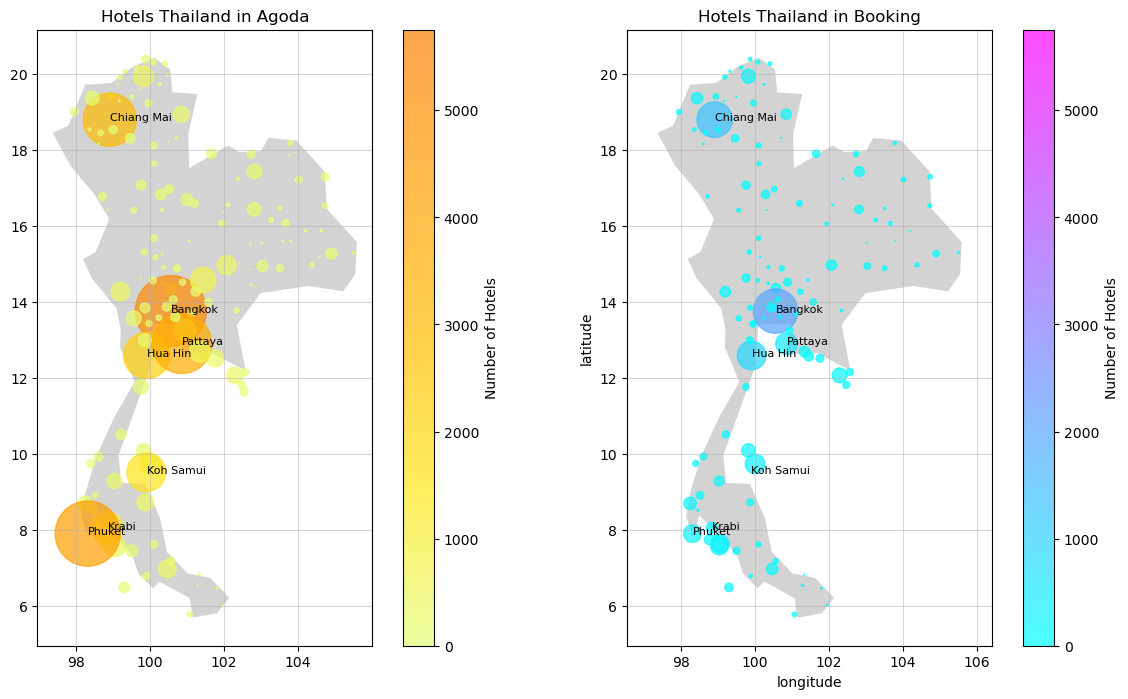

In [365]:




# initialize axis
fig, axs = plt.subplots(1, 2, figsize=(16,8))
# plot map on axis
countries = gpd.read_file(  
    gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Thailand"].plot(color="lightgrey", ax=axs[0])
# plot points
thailand.plot(x="longitude", y="latitude", kind="scatter", 
    c="agoda_num", s=thailand["agoda_num"]/2, colormap="Wistia", vmax=thailand.agoda_num.max()*1.1, vmin=0, alpha=0.7,
    title=f"Hotels Thailand in Agoda", 
    ax=axs[0])
# adding names of the cities
top = thailand.agoda_num.max()/5
for i in range(thailand.shape[0]):
    if thailand.agoda_num[i] > top:
        axs[0].text(x=thailand.longitude[i]+0.01, y=thailand.latitude[i]-0.03,s=thailand.city[i], fontdict=dict(size=8))
        axs[1].text(x=thailand.longitude[i]+0.01, y=thailand.latitude[i]-0.03,s=thailand.city[i], fontdict=dict(size=8))
#Removing X and Y labels
for ax in axs:
    ax.set(xlabel='', ylabel='')
#adding padding
plt.margins(0.1, 0.05)
axs[0].collections[-1].colorbar.set_label("Number of Hotels")
# adding grid
axs[0].grid(visible=True, alpha=0.5)
countries = gpd.read_file(  
    gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Thailand"].plot(color="lightgrey", ax=axs[1])
thailand.plot(x="longitude", y="latitude", kind="scatter", 
    c="booking_num", s=thailand["booking_num"]/2, colormap="cool", vmax=thailand.agoda_num.max()*1.1, vmin=0, alpha=0.7,
    title=f"Hotels Thailand in Booking", 
    ax=axs[1])
axs[1].grid(visible=True, alpha=0.5)
axs[1].collections[1].colorbar.set_label("Number of Hotels")
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()  